# Predicting Compression Strenght of Concrete

#### Description
Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce the size, as opposed to tensile strength, which withstands loads tending to elongate.

compressive strength is one of the most important engineering properties of concrete. It is a standard industry practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ from country to country based on the design code.

The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

The goal of the project is to develop a model to predict the compresive strenght of concrete using the attributes of concrete described below

#### Attribute information
Cement (component 1) — quantitative — kg in a m3 mixture — Input Variable

Blast Furnace Slag (component 2) — quantitative — kg in a m3 mixture — Input Variable

Fly Ash (component 3) — quantitative — kg in a m3 mixture — Input Variable

Water (component 4) — quantitative — kg in a m3 mixture — Input Variable

Superplasticizer (component 5) — quantitative — kg in a m3 mixture — Input Variable

Coarse Aggregate (component 6) — quantitative — kg in a m3 mixture — Input Variable

Fine Aggregate (component 7) — quantitative — kg in a m3 mixture — Input Variable

Age — quantitative — Day (1~365) — Input Variable

Concrete compressive strength — quantitative — MPa(megapascals) — Output Variable

The following will be done during the project
1. Data expolration and data imputation



2. Data preprocessing and feature engineering


3. Data modeling and models' performance assessment


4. Hyperparameter tuning and model selection




## Reading the dataset

In [1]:
# Importing the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('compresive_strength_concrete+2.csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


The column names are too long so for betterhandling of the dataset they will be shortened

In [3]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
data.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength']

In [5]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


A data summary and data plots will be used to analyse and visualize the distributions of the data columns.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


From the data summary above the data columns have their measurements on different scales with their standard deveiations varying widely from one column to the next. Feature scaling will be performed on the columns during preprocessing to normalize the data columns. 

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

<AxesSubplot:xlabel='Concrete compressive strength', ylabel='Density'>

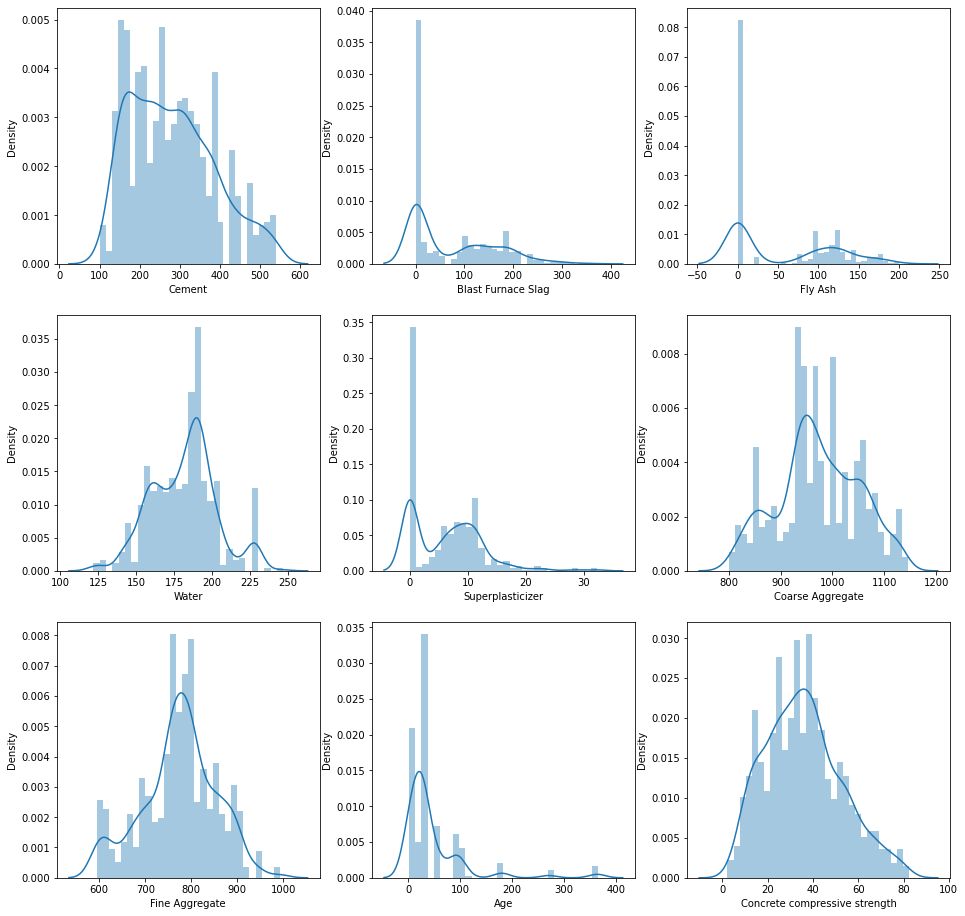

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(16,16))
sns.distplot(data['Cement'], kde=True, bins = 30, ax=ax[0][0])
sns.distplot(data['Blast Furnace Slag'], kde=True, bins=30, ax=ax[0][1])
sns.distplot(data['Fly Ash'], kde=True, bins=30, ax=ax[0][2])
sns.distplot(data['Water'], kde=True, bins=30, ax=ax[1][0])
sns.distplot(data['Superplasticizer'], kde=True, bins=30, ax=ax[1][1])
sns.distplot(data['Coarse Aggregate'], kde=True, bins=30, ax=ax[1][2])
sns.distplot(data['Fine Aggregate'], kde=True, bins=30, ax=ax[2][0])
sns.distplot(data['Age'], kde=True, bins=30, ax=ax[2][1])
sns.distplot(data['Concrete compressive strength'], kde=True, bins=30, ax=ax[2][2])

From the distribution plots most datapoints are outside the average values and some of them could potentially be outliers. The variables cement, water, coarse aggregate, fine aggregate and the target variable concrete compressive strenght are approximately normally distributed. Outliers will be explored using box and whisker plots. The other column distributions are skewed. The relationships between the data columns is explored below by a correlation plot and pairplot. Afterwards the first and theid quantiles for the data columns will be calculated.

<AxesSubplot:>

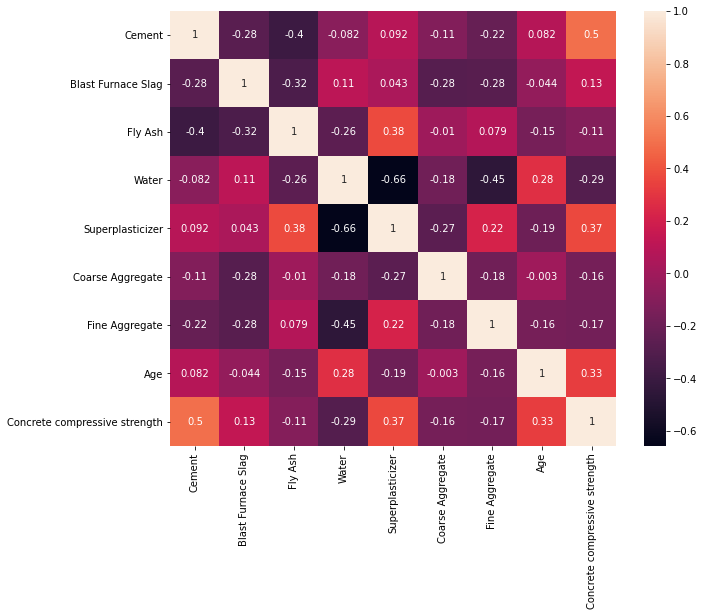

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

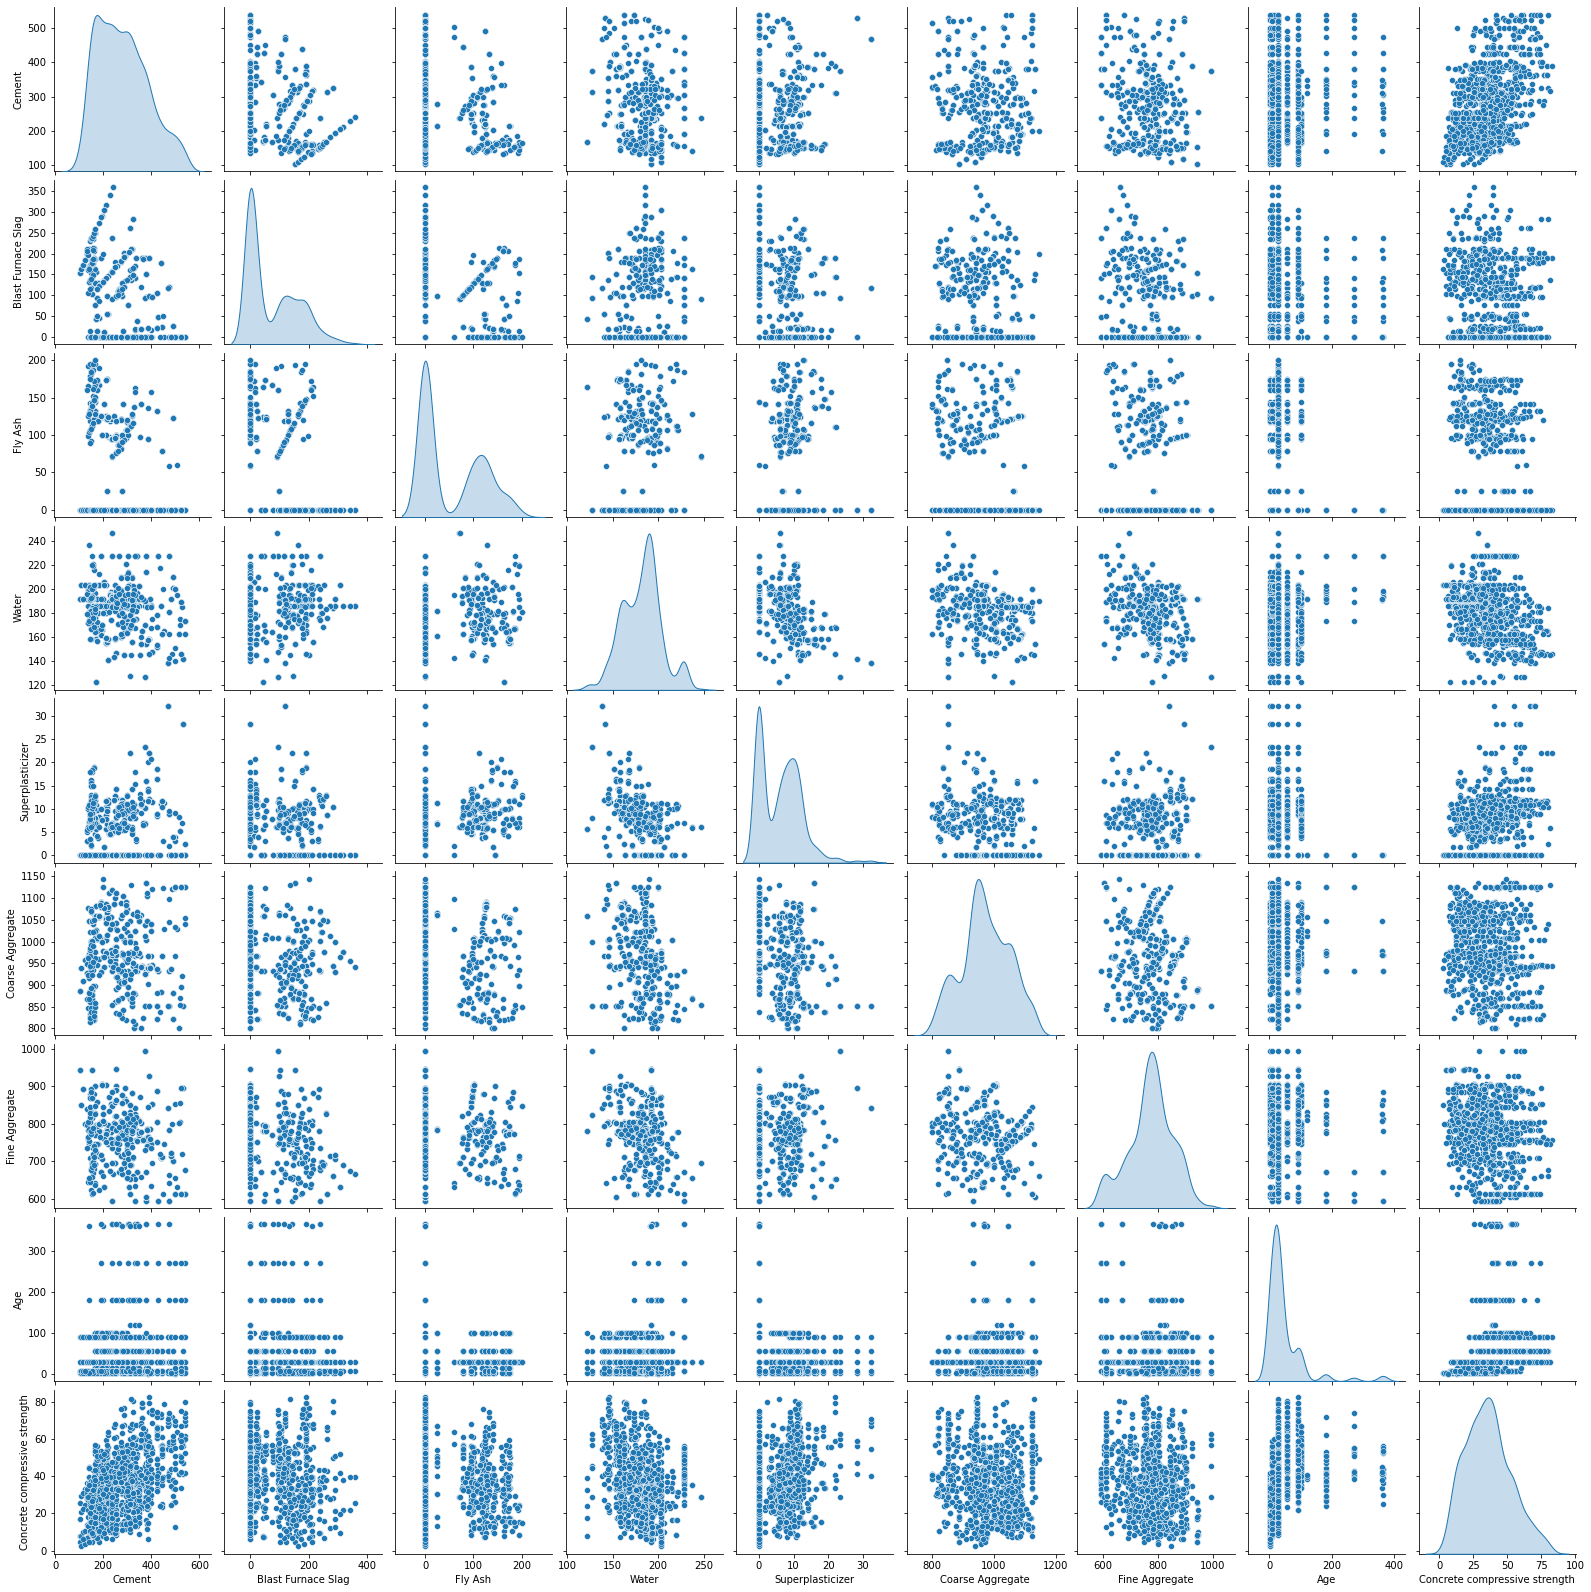

In [10]:
sns.pairplot(data, diag_kind='kde')

From the plots there is no significant problem with colinearity as the data columns do not show any relationship between themselves. 

#### Finding the outliers of the data columns

In [11]:
# Calculating the 1st and 3rd quantiles of the Cement column

from scipy import stats

Q1 = data['Cement'].quantile(q=0.25)
Q3 = data['Cement'].quantile(q=0.75)
print('The first quantile for the Cement column', Q1)
print('The third quantile for the Cement column', Q3)
print('The interquantile range for the Cement column', stats.iqr(data['Cement']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Cement column 192.375
The third quantile for the Cement column 350.0
The interquantile range for the Cement column 157.625
The outliers are below -44.0625 and above 586.4375


In [12]:
# Counting the number of outliers for the Cement column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Cement']<outlier1]['Cement'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Cement']>outlier2]['Cement'].count()) 

The number of outliers below 192.375 is 0
The number of outliers above 350.0 is 0


In [13]:
# Calculating the 1st and 3rd quantiles of the Blast Furnace Slag column

Q1 = data['Blast Furnace Slag'].quantile(q=0.25)
Q3 = data['Blast Furnace Slag'].quantile(q=0.75)
print('The first quantile for the Blast Furnace Slag column', Q1)
print('The third quantile for the Blast Furnace Slag column', Q3)
print('The interquantile range for the Blast Furnace Slag column', stats.iqr(data['Blast Furnace Slag']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Blast Furnace Slag column 0.0
The third quantile for the Blast Furnace Slag column 142.95
The interquantile range for the Blast Furnace Slag column 142.95
The outliers are below -214.42499999999998 and above 357.375


In [14]:
# Counting the number of outliers for the Blast Furnace Slag column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Blast Furnace Slag']<outlier1]['Blast Furnace Slag'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Blast Furnace Slag']>outlier2]['Blast Furnace Slag'].count()) 

The number of outliers below 0.0 is 0
The number of outliers above 142.95 is 2


In [15]:
# Calculating the 1st and 3rd quantiles of the Fly Ash column


Q1 = data['Fly Ash'].quantile(q=0.25)
Q3 = data['Fly Ash'].quantile(q=0.75)
print('The first quantile for the Fly Ash column', Q1)
print('The third quantile for the Fly Ash column', Q3)
print('The interquantile range for the Fly Ash column', stats.iqr(data['Fly Ash']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Fly Ash column 0.0
The third quantile for the Fly Ash column 118.3
The interquantile range for the Fly Ash column 118.3
The outliers are below -177.45 and above 295.75


In [16]:
# Counting the number of outliers for the Fly Ash column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Fly Ash']<outlier1]['Fly Ash'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Fly Ash']>outlier2]['Fly Ash'].count()) 

The number of outliers below 0.0 is 0
The number of outliers above 118.3 is 0


In [17]:
# Calculating the 1st and 3rd quantiles of the Water column


Q1 = data['Water'].quantile(q=0.25)
Q3 = data['Water'].quantile(q=0.75)
print('The first quantile for the Water column', Q1)
print('The third quantile for the Water column', Q3)
print('The interquantile range for the Water column', stats.iqr(data['Water']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Water column 164.9
The third quantile for the Water column 192.0
The interquantile range for the Water column 27.099999999999994
The outliers are below 124.25000000000001 and above 232.64999999999998


In [18]:
# Counting the number of outliers for the Water column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Water']<outlier1]['Water'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Water']>outlier2]['Water'].count()) 

The number of outliers below 164.9 is 5
The number of outliers above 192.0 is 4


In [19]:
# Calculating the 1st and 3rd quantiles of the Superplasticizer column


Q1 = data['Superplasticizer'].quantile(q=0.25)
Q3 = data['Superplasticizer'].quantile(q=0.75)
print('The first quantile for the Superplasticizer column', Q1)
print('The third quantile for the Superplasticizer column', Q3)
print('The interquantile range for the Superplasticizer column', stats.iqr(data['Superplasticizer']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Superplasticizer column 0.0
The third quantile for the Superplasticizer column 10.2
The interquantile range for the Superplasticizer column 10.2
The outliers are below -15.299999999999999 and above 25.5


In [20]:
# Counting the number of outliers for the Water column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Superplasticizer']<outlier1]['Superplasticizer'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Superplasticizer']>outlier2]['Superplasticizer'].count()) 

The number of outliers below 0.0 is 0
The number of outliers above 10.2 is 10


In [21]:
# Calculating the 1st and 3rd quantiles of the Coarse Aggregate column


Q1 = data['Coarse Aggregate'].quantile(q=0.25)
Q3 = data['Coarse Aggregate'].quantile(q=0.75)
print('The first quantile for the Coarse Aggregate column', Q1)
print('The third quantile for the Coarse Aggregate column', Q3)
print('The interquantile range for the Coarse Aggregate column', stats.iqr(data['Coarse Aggregate']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Coarse Aggregate column 932.0
The third quantile for the Coarse Aggregate column 1029.4
The interquantile range for the Coarse Aggregate column 97.40000000000009
The outliers are below 785.8999999999999 and above 1175.5000000000002


In [22]:
# Counting the number of outliers for the Coarse Aggregate column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Coarse Aggregate']<outlier1]['Coarse Aggregate'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Coarse Aggregate']>outlier2]['Coarse Aggregate'].count()) 

The number of outliers below 932.0 is 0
The number of outliers above 1029.4 is 0


In [23]:
# Calculating the 1st and 3rd quantiles of the Fine Aggregate column


Q1 = data['Fine Aggregate'].quantile(q=0.25)
Q3 = data['Fine Aggregate'].quantile(q=0.75)
print('The first quantile for the Fine Aggregate column', Q1)
print('The third quantile for the Fine Aggregate column', Q3)
print('The interquantile range for the Fine Aggregate column', stats.iqr(data['Fine Aggregate']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Fine Aggregate column 730.95
The third quantile for the Fine Aggregate column 824.0
The interquantile range for the Fine Aggregate column 93.04999999999995
The outliers are below 591.3750000000001 and above 963.5749999999999


In [24]:
# Counting the number of outliers for the Fine Aggregate column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Fine Aggregate']<outlier1]['Fine Aggregate'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Fine Aggregate']>outlier2]['Fine Aggregate'].count()) 

The number of outliers below 730.95 is 0
The number of outliers above 824.0 is 5


In [25]:
# Calculating the 1st and 3rd quantiles of the Age Aggregate column


Q1 = data['Age'].quantile(q=0.25)
Q3 = data['Age'].quantile(q=0.75)
print('The first quantile for the Age column', Q1)
print('The third quantile for the Age column', Q3)
print('The interquantile range for the Age column', stats.iqr(data['Age']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Age column 7.0
The third quantile for the Age column 56.0
The interquantile range for the Age column 49.0
The outliers are below -66.5 and above 129.5


In [26]:
# Counting the number of outliers for the Age column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Age']<outlier1]['Age'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Age']>outlier2]['Age'].count()) 

The number of outliers below 7.0 is 0
The number of outliers above 56.0 is 59


In [27]:
# Calculating the 1st and 3rd quantiles of the Concrete compressive strength column


Q1 = data['Concrete compressive strength'].quantile(q=0.25)
Q3 = data['Concrete compressive strength'].quantile(q=0.75)
print('The first quantile for the Concrete compressive strength column', Q1)
print('The third quantile for the Concrete compressive strength column', Q3)
print('The interquantile range for the Concrete compressive strength column', stats.iqr(data['Concrete compressive strength']))
print("The outliers are below {0} and above {1}".format(Q1-1.5*(Q3-Q1), Q3+1.5*(Q3-Q1)))

The first quantile for the Concrete compressive strength column 23.71
The third quantile for the Concrete compressive strength column 46.135000000000005
The interquantile range for the Concrete compressive strength column 22.425000000000004
The outliers are below -9.927500000000002 and above 79.77250000000001


In [28]:
# Counting the number of outliers for the Concrete compressive strength column

outlier1 = Q1-1.5*(Q3-Q1)
outlier2 = Q3+1.5*(Q3-Q1)

print('The number of outliers below', Q1 , 'is', data[data['Concrete compressive strength']<outlier1]['Concrete compressive strength'].count()) 
print('The number of outliers above', Q3 , 'is', data[data['Concrete compressive strength']>outlier2]['Concrete compressive strength'].count()) 

The number of outliers below 23.71 is 0
The number of outliers above 46.135000000000005 is 4


<AxesSubplot:>

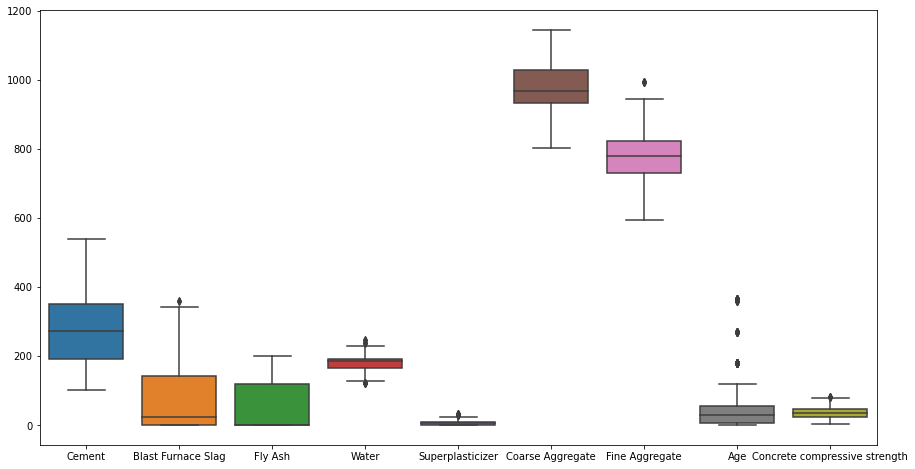

In [29]:
# Plotting box and whisker plots for the data columns

plt.figure(figsize=(15,8))
sns.boxplot(data=data)

The data columns that have outliers will have their outliers replaced by their median since their distributions are skewed. This help to prevent bias during data modeling as a result of wide variations from outliers

In [30]:
# Replacing the outliers for each data column

for col in data.columns[:-1]:
    
    Q1 = data[col].quantile(q=0.25)
    Q3 = data[col].quantile(q=0.75)
    iqr = Q3 - Q1
    
    lower = Q1-1.5*iqr
    higher = Q3+1.5*iqr
    
    data.loc[(data[col]<lower) | (data[col]>higher), col] = data[col].median()



<AxesSubplot:>

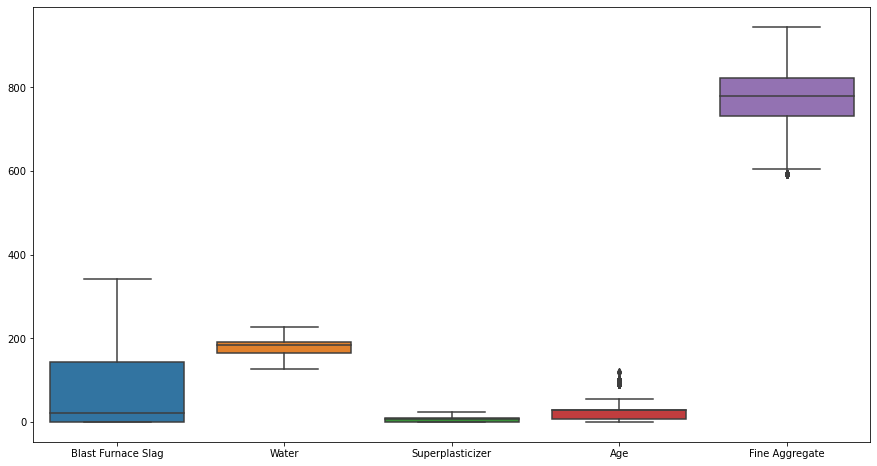

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data[['Blast Furnace Slag','Water','Superplasticizer','Age','Fine Aggregate']])

## Feature engineering and preprocessing

In [32]:
# Seperating the dependent and target variables

X = data[data.columns[:-1]]
Y = data['Concrete compressive strength']

In [33]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28


In [34]:
# Scaling the predictors to normalize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_transform

array([[ 2.47791487, -0.8581924 , -0.84714393, ...,  0.86315424,
        -1.22730564, -0.15315867],
       [ 2.47791487, -0.8581924 , -0.84714393, ...,  1.05616419,
        -1.22730564, -0.15315867],
       [ 0.49142531,  0.81154111, -0.84714393, ..., -0.52651741,
        -2.26970038, -0.15315867],
       ...,
       [-1.27008832,  0.77521708,  0.85063487, ..., -1.03606368,
         0.09475598, -0.15315867],
       [-1.16860982,  1.32945143, -0.84714393, ...,  0.21464081,
         0.20789394, -0.15315867],
       [-0.19403325,  0.31940913,  0.3769452 , ..., -1.39506219,
        -0.14041845, -0.15315867]])

In [35]:
df_X_trans = pd.DataFrame(X_transform, columns=data.columns[:-1])
df_X_trans

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159


In [36]:
# Splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_X_trans, Y, train_size=0.7, random_state=1)

In [37]:
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
185,-0.562611,-0.858192,0.664598,0.371331,-0.269174,-0.074874,1.242661,-0.656933
286,-0.955122,-0.858192,1.763621,-0.585295,0.297088,1.063885,0.066789,-0.153159
600,0.553653,-0.858192,-0.847144,0.745241,-1.091166,-0.063294,0.107468,-0.656933
691,-0.662175,0.797480,-0.847144,1.060879,-1.091166,0.006190,-0.286608,-1.052756
474,1.578011,-0.576974,0.387889,-0.954349,0.790283,-0.076161,-0.769669,-0.153159


## Data modeling and evaluation

Different models will be trained and their accuracy scores will be compared to identify the best models. The models will be regressor models since predictions of the concrete compressive strenght are to be made.

#### Random forest regressor

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_fit = rfr_model.fit(x_train, y_train)

In [40]:
rfr_fit.score(x_train, y_train)

0.980952561096172

In [41]:
pred = rfr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.8754487301748627

In [42]:
mean_squared_error(y_test, pred)

32.64578446743098

In [43]:
df_results = pd.DataFrame({'Algorithm':['Random Forest Regressor'], 'Accuracy':r2_acc}, index={'1'})

In [44]:
df_results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449


#### Random forest with k-fold cross validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(rfr_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [46]:
k_acc

0.9094661343349664

In [47]:
k_results

array([0.93460802, 0.88806726, 0.90207074, 0.89502195, 0.95078663,
       0.90332781, 0.86632289, 0.87493687, 0.8743023 , 0.91062906,
       0.93960673, 0.94277464, 0.94659122, 0.91382848, 0.90928057,
       0.94325349, 0.88181163, 0.87351156, 0.90441516, 0.93417567])

In [48]:
df_kfold = pd.DataFrame({'Algorithm':['Random Forest Regressor K-fold'], 'Accuracy':k_acc}, index={'2'})
results = pd.concat([df_results, df_kfold])

In [49]:
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466


#### Gradient boosting regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_fit = gbr_model.fit(x_train, y_train)

In [51]:
gbr_fit.score(x_train, y_train)

0.9477368610390589

In [52]:
pred = gbr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)

In [53]:
r2_acc

0.8804799946509992

In [54]:
mean_squared_error(y_test, pred)

31.327053828095117

In [55]:
df_gbr = pd.DataFrame({'Algorithm':['Gradient boosting regressor'], 'Accuracy':r2_acc}, index={'3'})
results = pd.concat([results, df_gbr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480


#### Gradient boosting regressor with K-fold cross validation

In [56]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(gbr_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [57]:
k_acc

0.8986942848687424

In [58]:
k_results

array([0.92042062, 0.86995356, 0.90836988, 0.91536337, 0.92721486,
       0.86170302, 0.8698606 , 0.87090844, 0.84051321, 0.88355869,
       0.924405  , 0.93492244, 0.92289111, 0.88941043, 0.89155554,
       0.90250588, 0.91932347, 0.89405325, 0.9114496 , 0.91550271])

In [59]:
df_gbr = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor K-fold'], 'Accuracy':k_acc}, index={'4'})
results = pd.concat([results, df_gbr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694


#### Ada boosting regressor

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_fit = abr_model.fit(x_train, y_train)

In [61]:
abr_fit.score(x_train, y_train)

0.8264682708304932

In [62]:
pred = abr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.765047643708928

In [63]:
mean_squared_error(y_test, pred)

61.58270400905511

In [64]:
df_abr = pd.DataFrame({'Algorithm':['Ada Boosting Regressor'], 'Accuracy':r2_acc}, index={'5'})
results = pd.concat([results, df_abr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048


#### Ada boosting with cross validation

In [65]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(abr_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [66]:
k_acc

0.776417096000155

In [67]:
k_results

array([0.77220223, 0.74838819, 0.77408674, 0.77919004, 0.83707441,
       0.76508413, 0.69729466, 0.75702632, 0.64917063, 0.77522605,
       0.79908772, 0.82448126, 0.84643354, 0.79484224, 0.79534231,
       0.87099647, 0.78077384, 0.75162657, 0.7820389 , 0.72797567])

In [68]:
df_abr = pd.DataFrame({'Algorithm':['Ada Boosting Regressor K-fold'], 'Accuracy':k_acc}, index={'6'})
results = pd.concat([results, df_abr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417


#### KNN regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor
k_errors = []

for i in range(1,45):
    nnr = KNeighborsRegressor(n_neighbors=i)
    nnr.fit(x_train, y_train)
    k_pred = nnr.predict(x_test)
    k_errors.append(mean_squared_error(y_test, k_pred))    


Text(0, 0.5, 'Mean error')

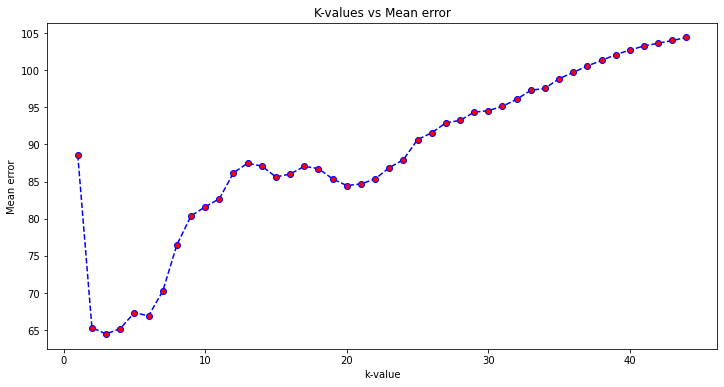

In [70]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(1,45)], k_errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('K-values vs Mean error')
plt.xlabel('k-value')
plt.ylabel('Mean error')

In [71]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_fit = knn_model.fit(x_train, y_train)

In [72]:
knn_fit.score(x_train, y_train)

0.9075702785732312

In [73]:
pred = knn_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.7539494934126327

In [74]:
mean_squared_error(y_test, pred)

64.49160909744695

In [75]:
df_knn = pd.DataFrame({'Algorithm':['KNN Regressor'], 'Accuracy':r2_acc}, index={'7'})
results = pd.concat([results, df_knn])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949


#### KNN regresor witk k-fold cross validation

In [76]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(knn_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [77]:
k_acc

0.7196606395353669

In [78]:
k_results

array([0.76155485, 0.71253991, 0.7854779 , 0.76789557, 0.73491785,
       0.71477667, 0.59687753, 0.65128836, 0.57380437, 0.71269149,
       0.63291437, 0.80886353, 0.71482045, 0.8093947 , 0.58890021,
       0.76277479, 0.8660213 , 0.73648643, 0.7121647 , 0.74904781])

In [79]:
df_knn = pd.DataFrame({'Algorithm':['KNN Regressor K-fold'], 'Accuracy':k_acc}, index={'8'})
results = pd.concat([results, df_knn])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661


#### Bagging regressor

In [80]:
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor()
bag_fit = bag_model.fit(x_train,y_train)

In [81]:
bag_fit.score(x_train,y_train)

0.9751683012311693

In [82]:
pred = bag_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.8463539164164471

In [83]:
mean_squared_error(y_test, pred)

40.2717446074663

In [84]:
df_bag = pd.DataFrame({'Algorithm':['Bagging Regressor'], 'Accuracy':r2_acc}, index={'9'})
results = pd.concat([results, df_bag])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354


#### Bagging regressor with k-fold cross validation

In [85]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(bag_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [86]:
k_acc

0.9019821799132404

In [87]:
k_results

array([0.93575928, 0.88273819, 0.89526125, 0.89336402, 0.94291462,
       0.88943077, 0.83223032, 0.86242702, 0.8709075 , 0.92902543,
       0.91119515, 0.9405156 , 0.94015374, 0.93136143, 0.89008146,
       0.94419933, 0.87829243, 0.84566429, 0.89261282, 0.93150897])

In [88]:
df_bag = pd.DataFrame({'Algorithm':['Bagging Regressor K-fold'], 'Accuracy':k_acc}, index={'10'})
results = pd.concat([results, df_bag])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Support vector regressor

In [89]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_fit = svr_model.fit(x_train, y_train)

In [90]:
svr_fit.score(x_train, y_train)

0.7296525761559521

In [91]:
pred = svr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.6549962611822545

In [92]:
mean_squared_error(y_test, pred)

90.4279636306755

In [93]:
df_svr = pd.DataFrame({'Algorithm':['Support Vector Regressor'], 'Accuracy':r2_acc}, index={'11'})
results = pd.concat([results, df_svr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Support vector regressor with k-fold cross validation

In [94]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(svr_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [95]:
k_acc

0.6904364613064702

In [96]:
k_results

array([0.78216068, 0.64403038, 0.84101874, 0.79023369, 0.67331137,
       0.57236679, 0.51175798, 0.65836752, 0.37432908, 0.61104894,
       0.74334706, 0.80102953, 0.7495388 , 0.7529562 , 0.62331217,
       0.75324753, 0.68337667, 0.73978141, 0.75033765, 0.75317706])

In [97]:
df_svr = pd.DataFrame({'Algorithm':['Support Vector Regressor K-fold'], 'Accuracy':k_acc}, index={'12'})
results = pd.concat([results, df_svr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### XGBoost regressor

In [98]:
# ! pip install xgboost

In [99]:
import xgboost as xgb

In [100]:
from xgboost.sklearn import XGBRegressor
xgr_model = XGBRegressor()
xgr_fit = xgr_model.fit(x_train, y_train)

In [101]:
xgr_fit.score(x_train, y_train)

0.9924341146964205

In [102]:
pred = xgr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.9004226612596836

In [103]:
mean_squared_error(y_test, pred)

26.09993734243447

In [104]:
df_xgb = pd.DataFrame({'Algorithm':['XGBoost Regressor'], 'Accuracy':r2_acc}, index={'13'})
results = pd.concat([results, df_xgb])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Decision tree regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_fit = dtr_model.fit(x_train, y_train)

In [106]:
dtr_fit.feature_importances_

array([0.30876547, 0.05911476, 0.00843888, 0.12442278, 0.04938364,
       0.02786331, 0.04904333, 0.37296783])

In [107]:
# Finding the important features from the decision tree model

print('Feature importance \n', pd.DataFrame(dtr_fit.feature_importances_, columns=['Importance'], index=X.columns))

Feature importance 
                     Importance
Cement                0.308765
Blast Furnace Slag    0.059115
Fly Ash               0.008439
Water                 0.124423
Superplasticizer      0.049384
Coarse Aggregate      0.027863
Fine Aggregate        0.049043
Age                   0.372968


In [108]:
dtr_fit.score(x_train, y_train)

0.9930841416603411

In [109]:
pred = dtr_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.7635309279608078

In [110]:
mean_squared_error(y_test, pred)

61.98024612549442

In [111]:
df_dtr = pd.DataFrame({'Algorithm':['Decision Tree Regressor'], 'Accuracy':r2_acc}, index={'14'})
results = pd.concat([results, df_dtr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Decision tree regresor with k fold cross validation

In [112]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(dtr_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [113]:
k_acc

0.8578880764502814

In [114]:
k_results

array([0.89156074, 0.77945542, 0.84497141, 0.79273969, 0.92405942,
       0.86639842, 0.78029552, 0.84563932, 0.81133666, 0.83563914,
       0.89752394, 0.92320074, 0.91702425, 0.89598461, 0.84974366,
       0.91923497, 0.826217  , 0.81690609, 0.82798694, 0.91184359])

In [115]:
df_svr = pd.DataFrame({'Algorithm':['Decision Tree Regressor K-fold'], 'Accuracy':k_acc}, index={'15'})
results = pd.concat([results, df_svr])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


The important features from the decision tree regressor will be used to rebuild and test the model. 

In [116]:
df_im_feat = df_X_trans.drop(['Fly Ash', 'Coarse Aggregate', 'Fine Aggregate', 'Superplasticizer'], axis=1)
df_im_feat

,Cement,Blast Furnace Slag,Water,Age
0,2.477915,-0.858192,-0.954349,-0.153159
1,2.477915,-0.858192,-0.954349,-0.153159
2,0.491425,0.811541,2.250592,-0.153159
3,0.491425,0.811541,2.250592,-0.153159
4,-0.790459,0.693195,0.502442,-0.153159
...,...,...,...,...
1025,-0.045645,0.501029,-0.099698,-0.153159
1026,0.392819,-0.858192,0.696681,-0.153159
1027,-1.270088,0.775217,0.536434,-0.153159
1028,-1.168610,1.329451,-0.293937,-0.153159


In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(df_im_feat, Y, train_size=0.70, random_state=1)

In [118]:
dec_model = DecisionTreeRegressor()
dec_fit = dec_model.fit(X_train, Y_train)

In [119]:
dec_fit.score(X_train, Y_train)

0.9903246498547756

In [120]:
pred = dec_fit.predict(X_test)
r2_acc = r2_score(Y_test, pred)
r2_acc

0.8114135173152499

In [121]:
df_dec = pd.DataFrame({'Algorithm':['Decision Tree Regressor 2'], 'Accuracy':r2_acc}, index={'16'})
results = pd.concat([results, df_dec])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Decision tree with hyperparemter tuning

In [122]:
dec_hyp_model = DecisionTreeRegressor(max_depth=4, random_state=1, min_samples_leaf=5)

In [123]:
dec_hyp_fit = dec_hyp_model.fit(X_train, Y_train)

In [124]:
print('Feature importance \n', pd.DataFrame(dec_hyp_fit.feature_importances_, columns=['Importance'], index=X_train.columns))

Feature importance 
                     Importance
Cement                0.370043
Blast Furnace Slag    0.012801
Water                 0.134855
Age                   0.482301


In [127]:
# plotting the decision tree

feature_columns = X_train.columns
feature_columns

Index(['Cement', 'Blast Furnace Slag', 'Water', 'Age'], dtype='object')

In [129]:
pred = dec_hyp_fit.predict(X_test)

In [130]:
dec_hyp_fit.score(X_train, Y_train)

0.7508864326433593

In [131]:
r2_acc = r2_score(Y_test, pred)
r2_acc

0.5706424122527523

In [132]:
mean_squared_error(Y_test, pred)

112.53771469958822

In [133]:
df_hyp = pd.DataFrame({'Algorithm':['Decision Tree Hyperparameter'], 'Accuracy':r2_acc}, index={'17'})
results = pd.concat([results, df_hyp])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


#### Descision tree hyperparameter tuned with k fold cross validation

In [134]:
k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(dec_hyp_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [135]:
k_acc

0.6848736234310453

In [136]:
k_results

array([0.64629909, 0.57259963, 0.78668692, 0.68835285, 0.68729189,
       0.68394737, 0.51495208, 0.76778457, 0.58668418, 0.67792974,
       0.7418812 , 0.7476584 , 0.73809204, 0.74022612, 0.69814236,
       0.66220688, 0.66234591, 0.61346289, 0.73340019, 0.74752816])

In [137]:
df_hyp = pd.DataFrame({'Algorithm':['Decision Tree Hyperparameter K-fold'], 'Accuracy':k_acc}, index={'18'})
results = pd.concat([results, df_hyp])
results

,Algorithm,Accuracy
1,Random Forest Regressor,0.875449
2,Random Forest Regressor K-fold,0.909466
3,Gradient boosting regressor,0.880480
4,Gradient Boosting Regressor K-fold,0.898694
5,Ada Boosting Regressor,0.765048
6,Ada Boosting Regressor K-fold,0.776417
7,KNN Regressor,0.753949
8,KNN Regressor K-fold,0.719661
9,Bagging Regressor,0.846354
10,Bagging Regressor K-fold,0.901982


## Hyperparameter tuning and Model selection

In [138]:
results.sort_values('Accuracy', ascending=False)

,Algorithm,Accuracy
2,Random Forest Regressor K-fold,0.909466
10,Bagging Regressor K-fold,0.901982
13,XGBoost Regressor,0.900423
4,Gradient Boosting Regressor K-fold,0.898694
3,Gradient boosting regressor,0.880480
1,Random Forest Regressor,0.875449
15,Decision Tree Regressor K-fold,0.857888
9,Bagging Regressor,0.846354
16,Decision Tree Regressor 2,0.811414
6,Ada Boosting Regressor K-fold,0.776417


The top three algorithms are the K-fold Random forest regressor, the k-fold bagging regressor and the XGBoost regressor. A grid search will be performed on the the three of them and the model with the best results will be used as the model for predicting the compressive strength of concrete. 

#### Random forest regressor k fold

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
rand_for_model = RandomForestRegressor()

In [141]:
parameters = {
    
    'n_estimators':[100,150,200],
    'criterion':['mse','mae'],
    'max_depth':[4,5,6],
    'max_features':['auto', 'sqrt', 'log2']
        
}

gs = GridSearchCV(estimator=rand_for_model, param_grid=parameters, cv=7)

In [142]:
gs_fit = gs.fit(x_train, y_train)

In [143]:
gs_fit.best_params_

In [144]:
rand_for_model = RandomForestRegressor(
 criterion = 'mse',
 max_depth = 6,
 max_features = 'auto',
 n_estimators = 100
)

In [145]:
model_fit = rand_for_model.fit(x_train,y_train)

In [146]:
model_fit.score(x_train, y_train)

0.9232209941263929

In [147]:
pred = model_fit.predict(x_test)
r2_acc = r2_score(y_test, pred)
r2_acc

0.8349093217171483

In [148]:
mean_squared_error(y_test, pred)

43.2714552679433

In [149]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(rand_for_model, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [150]:
k_acc

0.8512364202892917

In [151]:
print('Feature importance \n', pd.DataFrame(model_fit.feature_importances_, columns=['Importance'], index=x_train.columns))

Feature importance 
                     Importance
Cement                0.347831
Blast Furnace Slag    0.055818
Fly Ash               0.009261
Water                 0.140544
Superplasticizer      0.037657
Coarse Aggregate      0.026559
Fine Aggregate        0.021289
Age                   0.361041


In [152]:
df_feat = df_X_trans.drop(['Fine Aggregate', 'Coarse Aggregate', 'Superplasticizer', 'Fly Ash', 'Blast Furnace Slag'], axis=1)
df_feat

,Cement,Water,Age
0,2.477915,-0.954349,-0.153159
1,2.477915,-0.954349,-0.153159
2,0.491425,2.250592,-0.153159
3,0.491425,2.250592,-0.153159
4,-0.790459,0.502442,-0.153159
...,...,...,...
1025,-0.045645,-0.099698,-0.153159
1026,0.392819,0.696681,-0.153159
1027,-1.270088,0.536434,-0.153159
1028,-1.168610,-0.293937,-0.153159


In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feat, Y, train_size=0.70, random_state=1)

In [154]:
model_feat = RandomForestRegressor()
model_fit = model_feat.fit(X_train, Y_train)

In [155]:
model_fit.score(X_train, Y_train)

0.9657949169914537

In [156]:
pred = model_fit.predict(X_test)
r2_score = r2_score(Y_test, pred)
r2_score

0.7758862168103203

In [157]:
mean_squared_error(y_test, pred)

58.741835972146994

In [158]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(model_fit, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [159]:
k_acc

0.9111338928709211

#### Bagging regressor with k fold

In [160]:
model_bag = BaggingRegressor()
from sklearn.linear_model import LinearRegression

In [161]:
parameters = {
    'base_estimator':[RandomForestRegressor(), SVR(), LinearRegression(), 'None'],
    'n_estimators':[10,20,30],
    'max_samples' :[1, 3, 5],
    'max_features':[2, 3, 5],

}

gs = GridSearchCV(estimator= model_bag, param_grid=parameters, cv=7)

In [162]:
gs_fit = gs.fit(x_train,y_train)

In [163]:
gs_fit.best_params_

In [164]:
bag_model = BaggingRegressor(base_estimator=RandomForestRegressor())

In [165]:
bag_fit = bag_model.fit(x_train, y_train)
bag_fit.score(x_train, y_train)

0.9557319007903053

In [166]:
pred = bag_fit.predict(x_test)
r2_ = bag_fit.score(x_test, y_test)
r2_

0.8668621815960597

In [167]:
mean_squared_error(y_test, pred)

34.89638066461368

In [168]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(bag_fit, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [169]:
k_acc

0.8983238540918184

#### XGBoost regressor

In [170]:
xgb_model = XGBRegressor()

In [171]:
parameters = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [2,3,5,7,9],
    'learning_rate':[0.1, 0.001, 0.0001, 0.00001],
    'booster':['gbtree', 'gblinear','dart'],
    
}

gs = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=7)

In [172]:
gs_fit = gs.fit(x_train, y_train)

In [173]:
gs_fit.best_params_

In [174]:
model_xgb = XGBRegressor(booster='dart', learning_rate=0.1, max_depth=5, n_estimators=100)
xgb_fit = model_xgb.fit(x_train, y_train)

In [175]:
xgb_fit.score(x_train,y_train)

0.9792441616322259

In [176]:
pred =  xgb_fit.predict(x_test)
r2_acc = xgb_fit.score(x_test,y_test)
r2_acc

0.9016461391319368

In [177]:
mean_squared_error(y_test,pred)

25.7792549842833

In [178]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(xgb_fit, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [179]:
k_acc

0.9232426915337169

Of the final three models XGBRegressor has the best R2 score and the lowest mean squared error. The important features will be evaluated below and used to train the dataset. 

In [180]:
print('Feature importance \n', pd.DataFrame(xgb_fit.feature_importances_, columns=['Importance'], index=x_train.columns))

Feature importance 
                     Importance
Cement                0.273429
Blast Furnace Slag    0.094388
Fly Ash               0.023907
Water                 0.112583
Superplasticizer      0.061620
Coarse Aggregate      0.025298
Fine Aggregate        0.035708
Age                   0.373068


In [181]:
df_xgb_feat = df_X_trans.drop(['Fine Aggregate', 'Coarse Aggregate', 'Superplasticizer', 'Fly Ash', 'Blast Furnace Slag'], axis=1)
df_xgb_feat

,Cement,Water,Age
0,2.477915,-0.954349,-0.153159
1,2.477915,-0.954349,-0.153159
2,0.491425,2.250592,-0.153159
3,0.491425,2.250592,-0.153159
4,-0.790459,0.502442,-0.153159
...,...,...,...
1025,-0.045645,-0.099698,-0.153159
1026,0.392819,0.696681,-0.153159
1027,-1.270088,0.536434,-0.153159
1028,-1.168610,-0.293937,-0.153159


In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(df_xgb_feat, Y, train_size=0.70, random_state=1)

In [183]:
parameters = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [2,3,5,7,9],
    'learning_rate':[0.1, 0.001, 0.0001, 0.00001],
    'booster':['gbtree', 'gblinear','dart'],
    
}

gs = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=7)

In [184]:
gs_fit = gs.fit(X_train,Y_train)

[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in langu


[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang


[14:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in lang

In [185]:
gs_fit.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [186]:
model_feat_xgb = XGBRegressor(booster = 'gbtree',
 learning_rate = 0.1,
 max_depth = 5,
 n_estimators = 100)

fit_xgb = model_xgb.fit(X_train, Y_train)
fit_xgb.score(X_train, Y_train)

0.9373123536963904

In [187]:
pred = fit_xgb.predict(X_test)
r2_acc = fit_xgb.score(X_test, Y_test)
r2_acc

0.8071704099008538

In [188]:
mean_squared_error(Y_test,pred)

50.542023747792406

In [189]:
from sklearn.model_selection import KFold, cross_val_score

k = 20
k_fold = KFold(n_splits=k, random_state=20, shuffle=True)
k_results = cross_val_score(fit_xgb, X, Y, cv=k_fold)
k_acc = abs(k_results).mean()

In [190]:
k_acc

0.9232426915337169

## Conclusion

Of the 18 algorithmns trained to predict the compression strenght of concrete the XGBRegressor algorithm performed the best with a R2 value of 90%. The model explains 90 percent of the variation in the dataset. The important features that the model used in its prediction were the Cement, Age and Water of the concrete mixture. 